<a href="https://colab.research.google.com/github/ABCutter/Cohort-18-Projects/blob/main/Project6_Images_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Images – To Do List



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition



* Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.

* Load necessary packages.



In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow as tf
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from PIL import Image

## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [2]:
# LOAD PICKLEs
with open('X.pickle', 'rb') as file:
    pickle_X = pickle.load(file)

with open('y.pickle', 'rb') as file:
    pickle_y = pickle.load(file)

In [3]:
pickle_X.shape

(24946, 100, 100, 1)

In [4]:
len(pickle_y)

24946

In [5]:
y = pickle_y

In [6]:
class_names = ['Cat', 'Dog']  # adjust as needed

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [7]:
X_scale = pickle_X.astype('float32') / 255.0

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot a few ( >5 ) of the images in X using `plt.imshow()`.

* Look at the response values in y for those images.

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.



In [8]:
f'X:{X_scale.shape}, y:{len(pickle_y)}'

'X:(24946, 100, 100, 1), y:24946'

In [9]:
X = X_scale
y = pickle_y

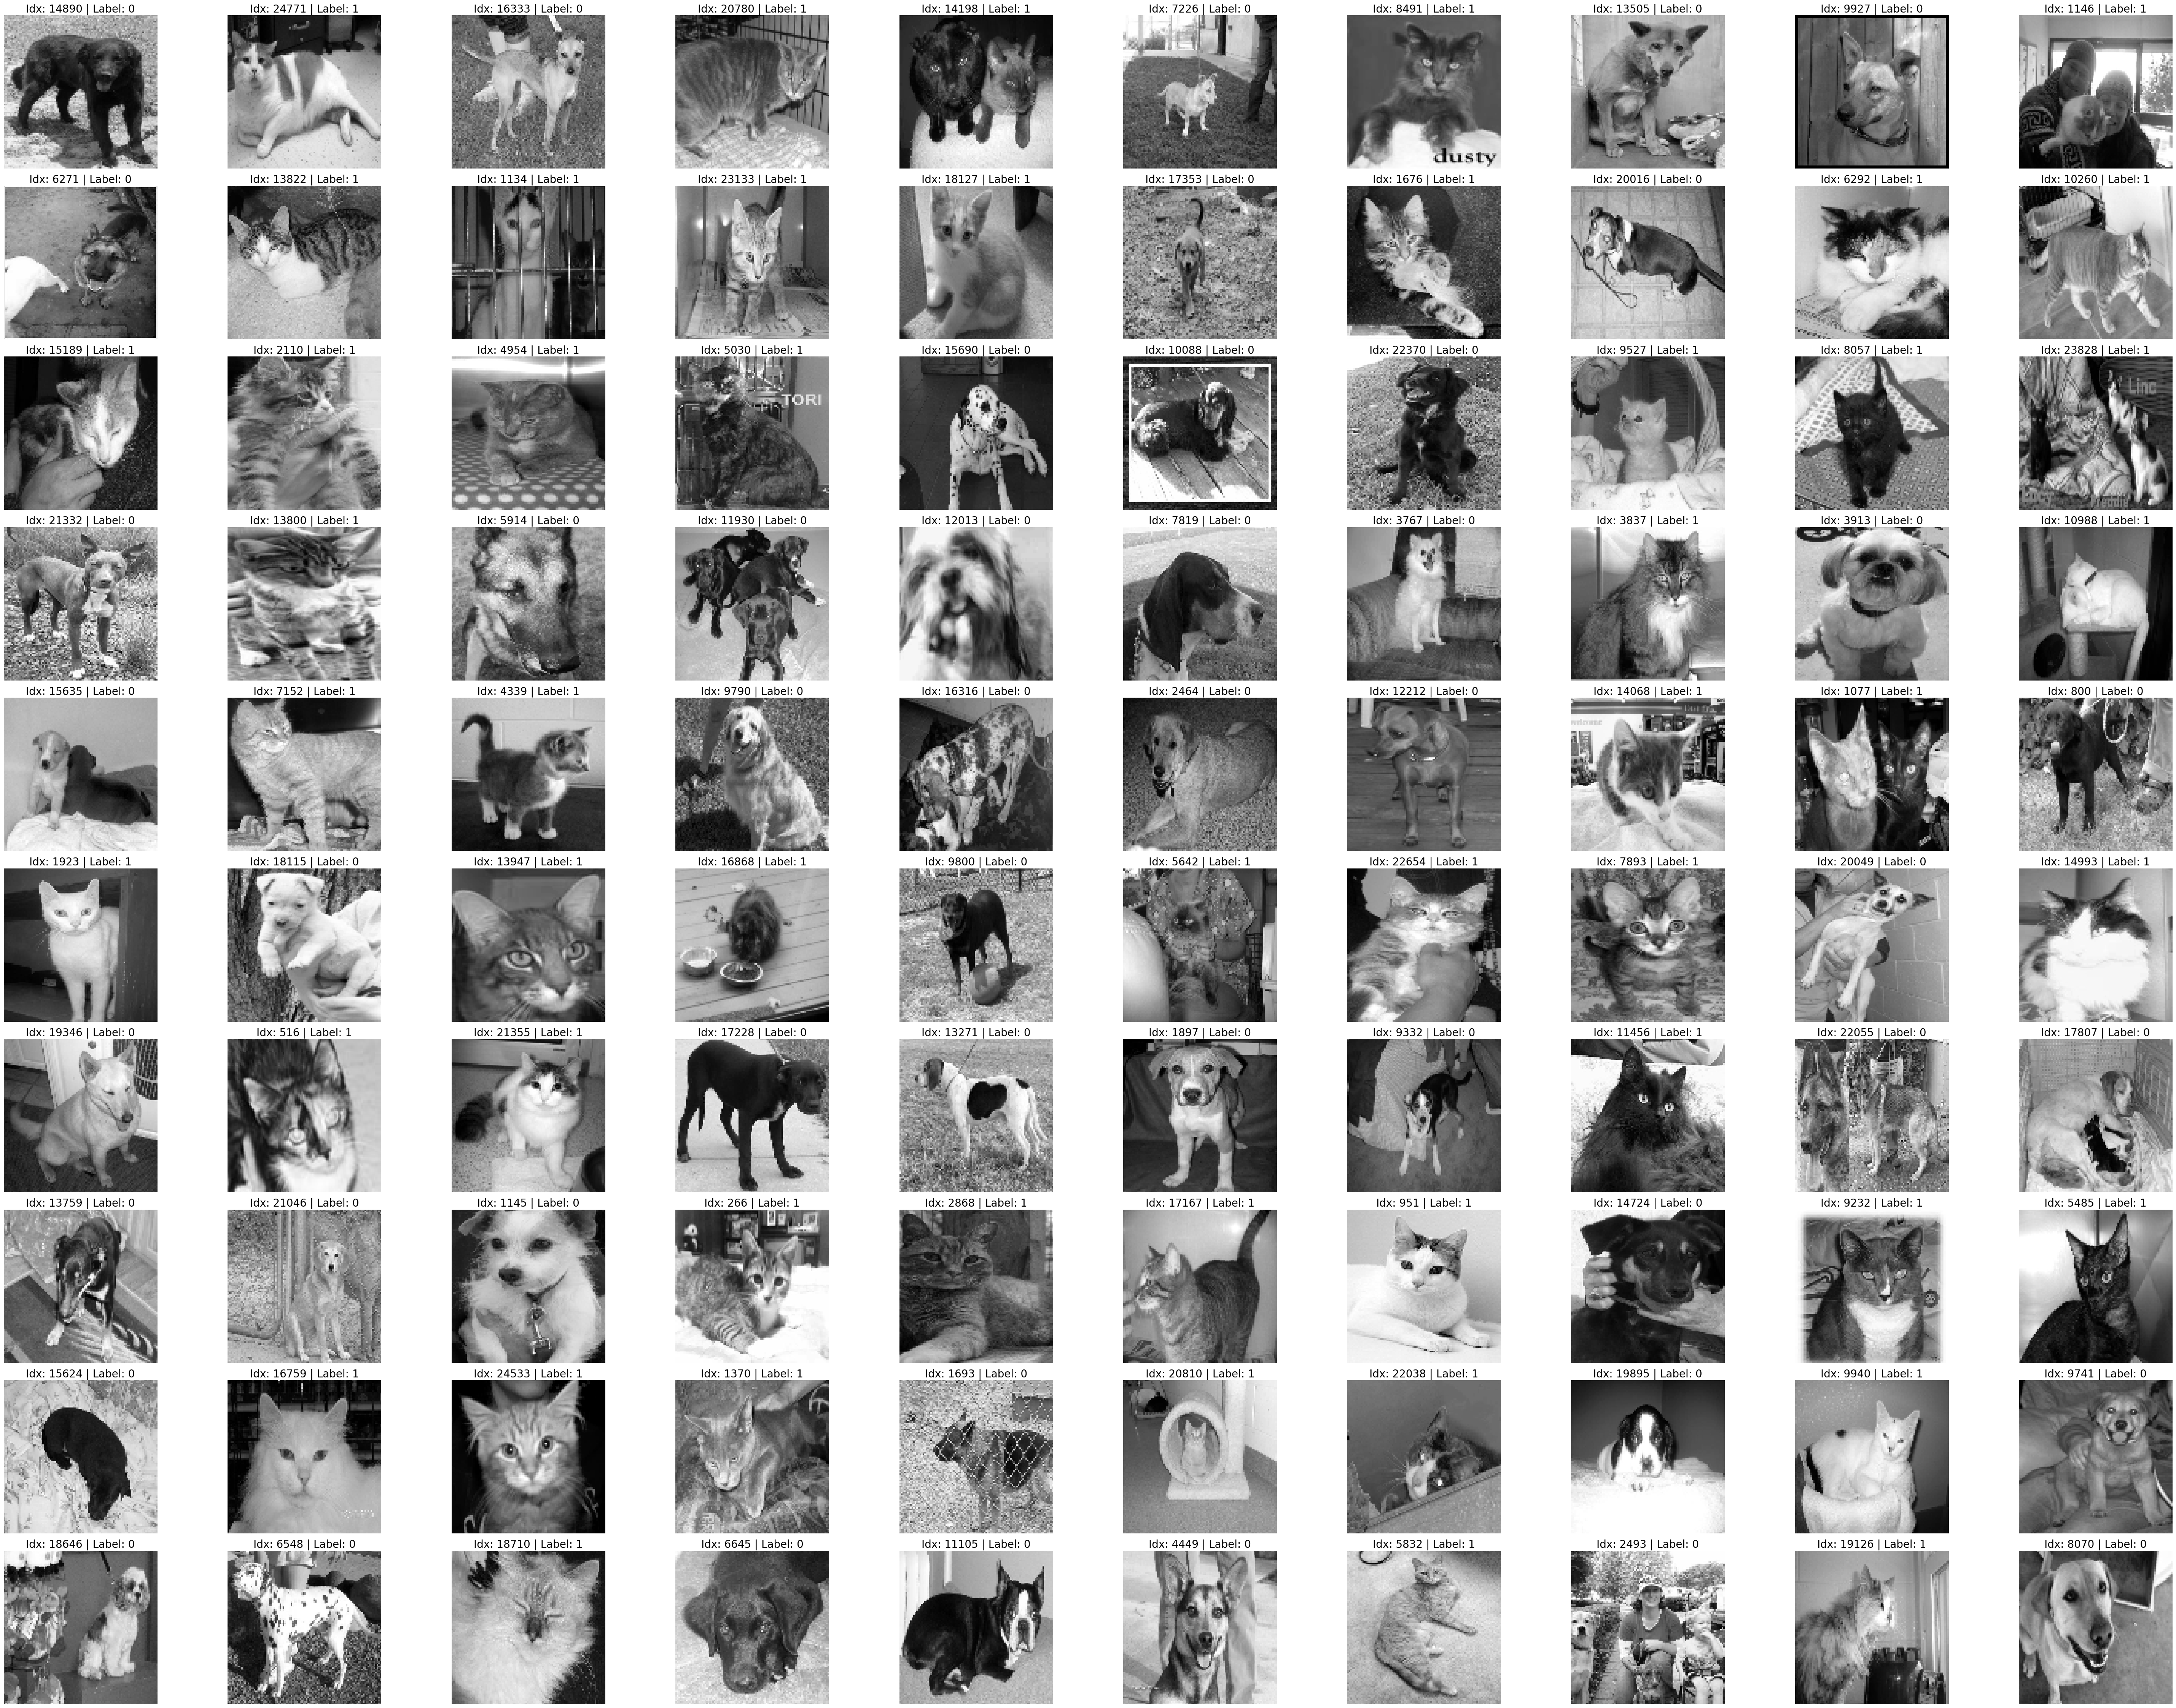

In [10]:
 # Random image generator
num_images = 100
random_indices = np.random.choice(len(X), num_images, replace=False)

# Dislay grid
rows, cols = 10, 10
fig, axes = plt.subplots(rows, cols, figsize=(60, 45))

for i, ax in enumerate(axes.flat):
    idx = random_indices[i]
    image = X[idx].squeeze()  # remove single channel dimension
    label = y[idx]

    ax.imshow(image, cmap='gray')
    ax.set_title(f"Idx: {idx} | Label: {label}", fontsize=20)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

We see that y values: 0 = dog, 1 = cat

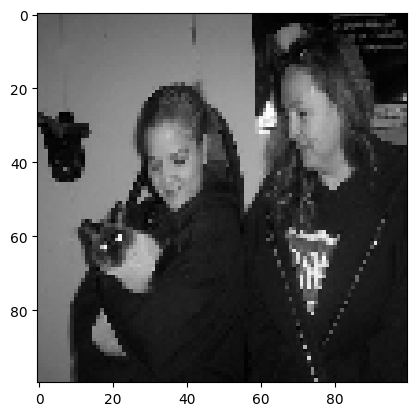

In [11]:
plt.imshow(X[1261],cmap='gray')
plt.show()

Terrible photos:


* 21621
* 8700
* 1261
* 16014 #very odd




In [12]:
#Checking if y is behaving itself
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1] [12470 12476]


## Data Processing



* Split X and y into training and testing sets.

*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Plot the distribution of probabilities for the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



In [13]:
# Split 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", len(y_train))
print("y_test shape:", len(y_test))

X_train shape: (19956, 100, 100, 1)
X_test shape: (4990, 100, 100, 1)
y_train shape: 19956
y_test shape: 4990


In [14]:
# View before normalization
X_train[0][10]

array([[0.42745098],
       [0.44313726],
       [0.47058824],
       [0.45490196],
       [0.4745098 ],
       [0.5803922 ],
       [0.5294118 ],
       [0.5411765 ],
       [0.5294118 ],
       [0.5411765 ],
       [0.53333336],
       [0.5411765 ],
       [0.59607846],
       [0.59607846],
       [0.68235296],
       [0.6313726 ],
       [0.61960787],
       [0.6039216 ],
       [0.65882355],
       [0.6784314 ],
       [0.65882355],
       [0.7137255 ],
       [0.7490196 ],
       [0.8039216 ],
       [0.69411767],
       [0.74509805],
       [0.83137256],
       [0.7058824 ],
       [0.64705884],
       [0.6509804 ],
       [0.6431373 ],
       [0.77254903],
       [0.7607843 ],
       [0.85490197],
       [0.8117647 ],
       [0.7921569 ],
       [0.8666667 ],
       [0.89411765],
       [0.9490196 ],
       [0.9254902 ],
       [0.9411765 ],
       [0.95686275],
       [0.9529412 ],
       [0.96862745],
       [0.9529412 ],
       [0.9607843 ],
       [1.        ],
       [0.960

In [15]:
#Didn't need to do this because it is already normalized
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [16]:
# View after normalization
X_train[0][10]

array([[0.06446279],
       [0.06688302],
       [0.07175411],
       [0.0700595 ],
       [0.07339962],
       [0.08944656],
       [0.07980514],
       [0.08180387],
       [0.08183352],
       [0.08340504],
       [0.08210807],
       [0.08329748],
       [0.0905149 ],
       [0.09323411],
       [0.10432161],
       [0.09585094],
       [0.09535354],
       [0.09209566],
       [0.1028728 ],
       [0.10409401],
       [0.10414395],
       [0.11335874],
       [0.11417785],
       [0.1271025 ],
       [0.1140113 ],
       [0.1225811 ],
       [0.13908431],
       [0.11942944],
       [0.11639656],
       [0.11762529],
       [0.1171497 ],
       [0.14317422],
       [0.14008254],
       [0.15689018],
       [0.14821896],
       [0.13862477],
       [0.14881675],
       [0.15467872],
       [0.15943754],
       [0.15459889],
       [0.1588584 ],
       [0.16029593],
       [0.16943389],
       [0.1883759 ],
       [0.19393204],
       [0.19153287],
       [0.20687176],
       [0.201

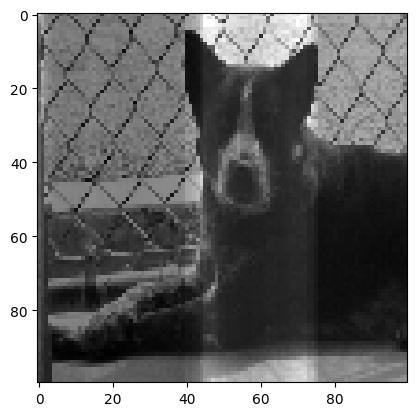

In [17]:
plt.imshow(X_train[321],cmap='gray')
plt.show()

In [18]:
# #Start the model as a feed forward (sequential) model.
# model = Sequential()

# # Flatten input data into a 1D structure
# model.add(Flatten())

# # Define first hidden layers
# model.add(
#   Dense(
#     name = "hidden1",
#     units = 144,
#     activation = 'relu' ,
#   )
# )

# # Add second hidden layer
# model.add(
#   Dense(
#     name = "hidden2",
#     units = 144,
#     activation = 'relu' ,
#   )
# )

# # Define output layer
# model.add(
#   Dense(
#     name = "output",
#     units = 2,
#     activation = 'softmax' ,
#   )
# )

In [19]:
# #Compile model
# model.compile(
#     optimizer = 'adam',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['accuracy'],
# )

In [20]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [21]:
# #Fit model
# model.fit(X_train, y_train, epochs=8) ;

In [22]:
# model.summary()

In [23]:
# plot_model(model)

In [24]:
# val_loss, val_acc = model.evaluate(X_test, y_test)
# val_acc

In [25]:
# #Use Model for prediction
# predictions = model.predict(X_test)


In [26]:
# X_test.shape

In [27]:
# predictions.shape

In [28]:
# creature = 420

In [29]:
# print(predictions[creature])

In [30]:
# [ print(f"{k}: {x:.2f}") for k, x in enumerate(predictions[creature]*100) ]


In [31]:
# print(np.argmax(predictions[creature]))

In [32]:
# y_test[creature]

In [33]:
# plt.imshow(X_test[creature], cmap='gray')
# plt.axis('off')
# plt.show()

Now let's do a CNN

Build a convolutional neural network with the following:

Sequential layers
At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
A dense output layer using the 'sigmoid' activation function. Note: you can play around with the number of layers and nodes to try to get better performance.
Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

Fit your model using the training set.

Evaluate your model using the testing set.

Plot the distribution of probabilities for the testing set.

Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: numpy.reshape

Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

(Pillow can be used, import PIL)
(from PIL import Image)
(reshape and greyscale image)

Use the neural network you created to predict whether the image is a dog or a cat.

In [34]:
X_train.shape

(19956, 100, 100, 1)

In [35]:
X_train[0][10][9]

array([0.08340504], dtype=float32)

In [36]:
# shape of a single image
X_train.shape[1:]

(100, 100, 1)

In [37]:
#Define Keras Model
model = Sequential()

In [38]:
# Define input layer
model.add(
  Input(
    shape=X_train.shape[1:],
    name="model_input",
  ),
)

In [39]:
# Define first hidden layer
model.add(
  Conv2D(
    name = "Conv1",
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
    MaxPooling2D(pool_size=(2,2))
)


In [40]:
# Define second hidden layer
model.add(
  Conv2D(
    name = "Conv2",
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
  MaxPooling2D(pool_size=(2,2))
)


In [41]:
# Flatten data to be used in output layer
model.add(
    Flatten()
)

# Define output layer
model.add(
  Dense(
    name = "output",
    units = 2,
    activation = 'softmax',
  )
)


In [42]:
# from google.colab import drive
# drive.mount('/content/drive')

In [43]:
# Compile model
model.compile(
  optimizer = 'adam',
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy'],
)


In [44]:
# Fit model
model.fit(X_train, y_train, epochs=8)

Epoch 1/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.5782 - loss: 0.6714
Epoch 2/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.7125 - loss: 0.5576
Epoch 3/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7561 - loss: 0.5099
Epoch 4/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7800 - loss: 0.4705
Epoch 5/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7946 - loss: 0.4466
Epoch 6/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8086 - loss: 0.4225
Epoch 7/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8182 - loss: 0.4006
Epoch 8/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8323 - loss: 0.3850


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │        67,714 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,848 (1.20 MB)

 Trainable params: 105,282 (411.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 210,566 (822.53 KB)

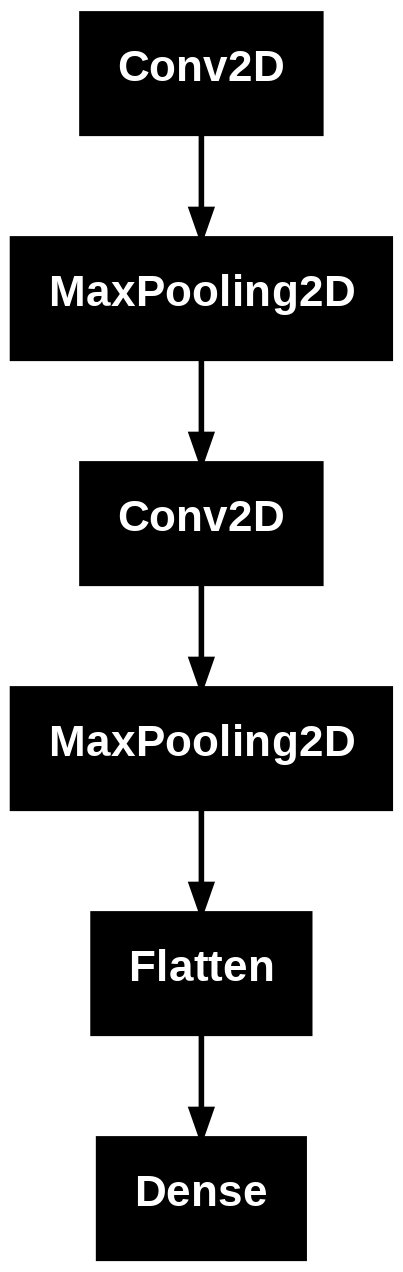

In [46]:
plot_model(model)

In [47]:
y_probs = model.predict(X_test)

156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


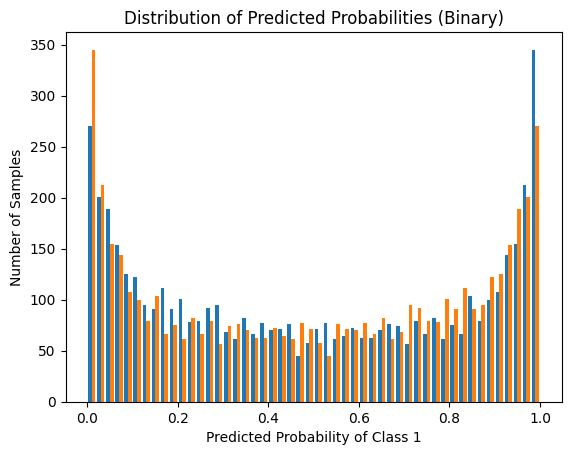

In [48]:
plt.hist(y_probs, bins=50)
plt.title("Distribution of Predicted Probabilities (Binary)")
plt.xlabel("Predicted Probability of Class 1")
plt.ylabel("Number of Samples")
plt.show()

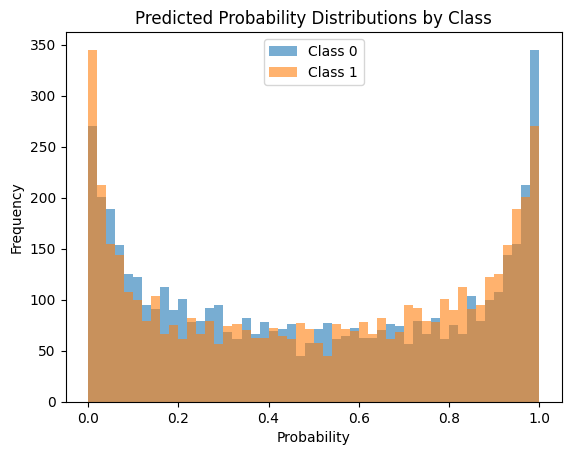

In [49]:
num_classes = y_probs.shape[1]

for class_index in range(num_classes):
    plt.hist(y_probs[:, class_index], bins=50, alpha=0.6, label=f"Class {class_index}")

plt.title("Predicted Probability Distributions by Class")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [50]:
val_loss, val_acc = model.evaluate(X_test, y_test)
val_acc

156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7712 - loss: 0.4877


0.7747495174407959

Leaving off here: https://colab.research.google.com/drive/1JdWklmxOZIfHXgDeYE0FFD-r1sz5up_u#scrollTo=Evaluate_model

In [51]:
def preprocess_image_from_file(filepath, target_size=(100, 100)):
    # Open image file
    img = Image.open(filepath)

    # Convert to grayscale
    img = img.convert('L')  # 'L' mode = grayscale

    # Resize to match model input size
    img = img.resize(target_size)

    # Convert to NumPy array and normalize
    img_array = np.array(img).astype('float32') / 255.0

    # Reshape to 4D array: (1, height, width, channels)
    img_4d = img_array.reshape(1, target_size[0], target_size[1], 1)

    return img_4d

In [52]:
dog = preprocess_image_from_file("dog.jpg")

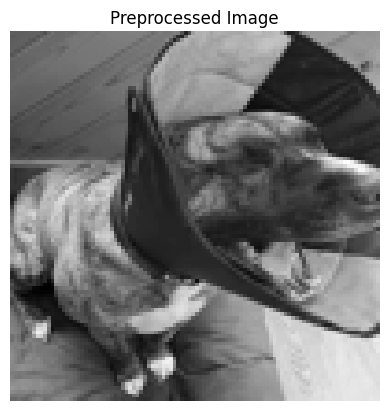

In [53]:
plt.imshow(dog[0].squeeze(), cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')
plt.show()

In [54]:
prediction = model.predict(dog)
print("Predicted probabilities:", prediction)

for i, prob in enumerate(prediction[0]):
    print(f"{class_names[i]}: {prob*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
Predicted probabilities: [[0.9683032  0.03169686]]
Cat: 96.83%
Dog: 3.17%


In [55]:
print(np.argmax(prediction))

0


In [56]:
cddc = preprocess_image_from_file("catdogdogcat.png")

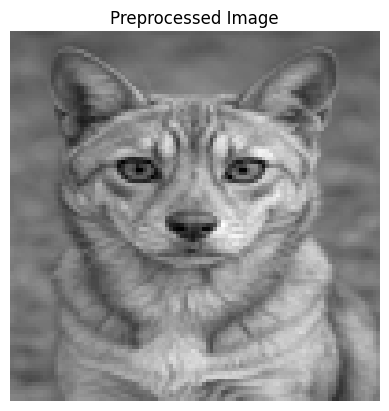

In [57]:
plt.imshow(cddc[0].squeeze(), cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')
plt.show()

In [58]:
prediction = model.predict(cddc)
print("Predicted probabilities:", prediction)

for i, prob in enumerate(prediction[0]):
    print(f"{class_names[i]}: {prob*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted probabilities: [[0.10916582 0.8908342 ]]
Cat: 10.92%
Dog: 89.08%


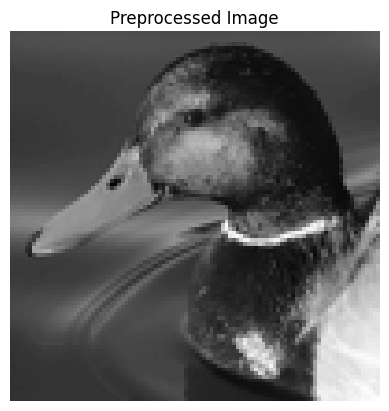

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted probabilities: [[0.99885297 0.00114703]]
0: 99.89
1: 0.11


[None, None]

In [59]:
mallard = preprocess_image_from_file("mallard.jpg")

plt.imshow(mallard[0].squeeze(), cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')
plt.show()

prediction = model.predict(mallard)
print("Predicted probabilities:", prediction)
[ print(f"{k}: {x:.2f}") for k, x in enumerate(prediction[0]*100) ]

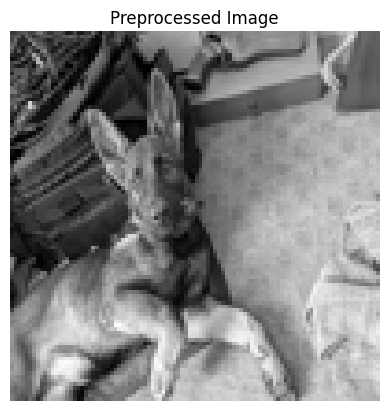

In [60]:
beast = preprocess_image_from_file("beast.png")

plt.imshow(beast[0].squeeze(), cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')
plt.show()

In [61]:
prediction = model.predict(beast)
print("Predicted probabilities:", prediction)

for i, prob in enumerate(prediction[0]):
    print(f"{class_names[i]}: {prob*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted probabilities: [[0.8028209  0.19717911]]
Cat: 80.28%
Dog: 19.72%


## Communication of Results



* Communicate the results of your analysis.
See Presentation 6


## **BONUS** (optional)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


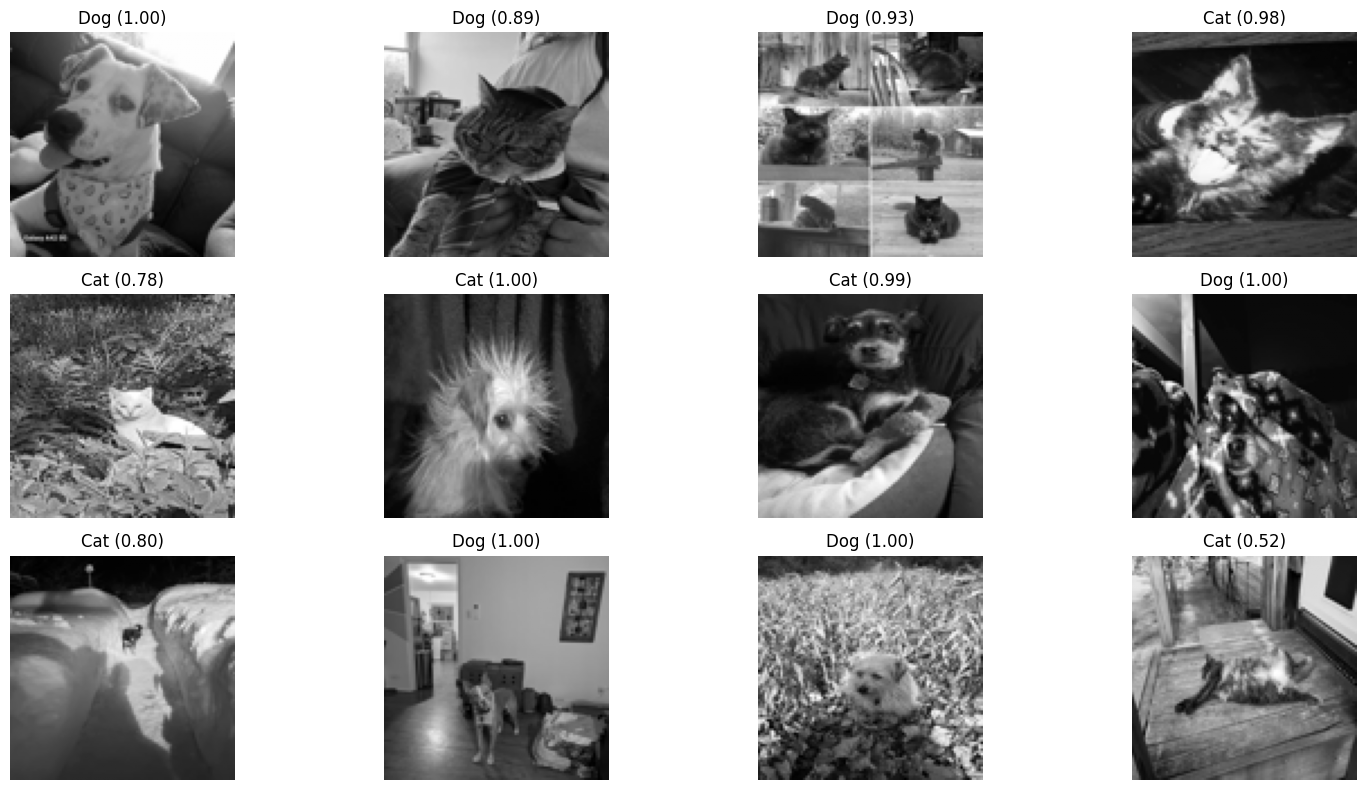

In [62]:
# --- Step 1: Preprocessing function ---
def preprocess_image_from_file(filepath, target_size=(100, 100)):
    img = Image.open(filepath).convert('L')  # Convert to grayscale
    img = img.resize(target_size)
    img_array = np.array(img).astype('float32') / 255.0
    return img_array.reshape(1, target_size[0], target_size[1], 1)

# --- Step 2: Load and process 8 images ---
image_list = []
file_names = [f"pet{i}.jpeg" for i in range(1, 13)]

for filename in file_names:
    processed_img = preprocess_image_from_file(filename)
    image_list.append(processed_img)

# Stack into a single batch: shape (8, height, width, 1)
X_batch = np.vstack(image_list)

# --- Step 3: Predict with softmax output (2 nodes) ---
y_probs = model.predict(X_batch)  # shape: (8, 2)
pred_classes =  1- np.argmax(y_probs, axis=1)       # class index (0 or 1)
pred_confidence = np.max(y_probs, axis=1)       # highest class prob per image

# --- Step 4: Display results in a grid ---
rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_batch[i].squeeze(), cmap='gray')
    label = class_names[pred_classes[i]]
    confidence = pred_confidence[i]
    ax.set_title(f"{label} ({confidence:.2f})")
    ax.axis('off')

plt.tight_layout()
plt.show()


* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.

Index 9521 → Label: 1
Index 15847 → Label: 1
Index 1842 → Label: 0
Index 15880 → Label: 1
Index 5573 → Label: 1
Index 10919 → Label: 1
Index 15018 → Label: 0
Index 789 → Label: 1
Index 18370 → Label: 0
Index 10066 → Label: 1


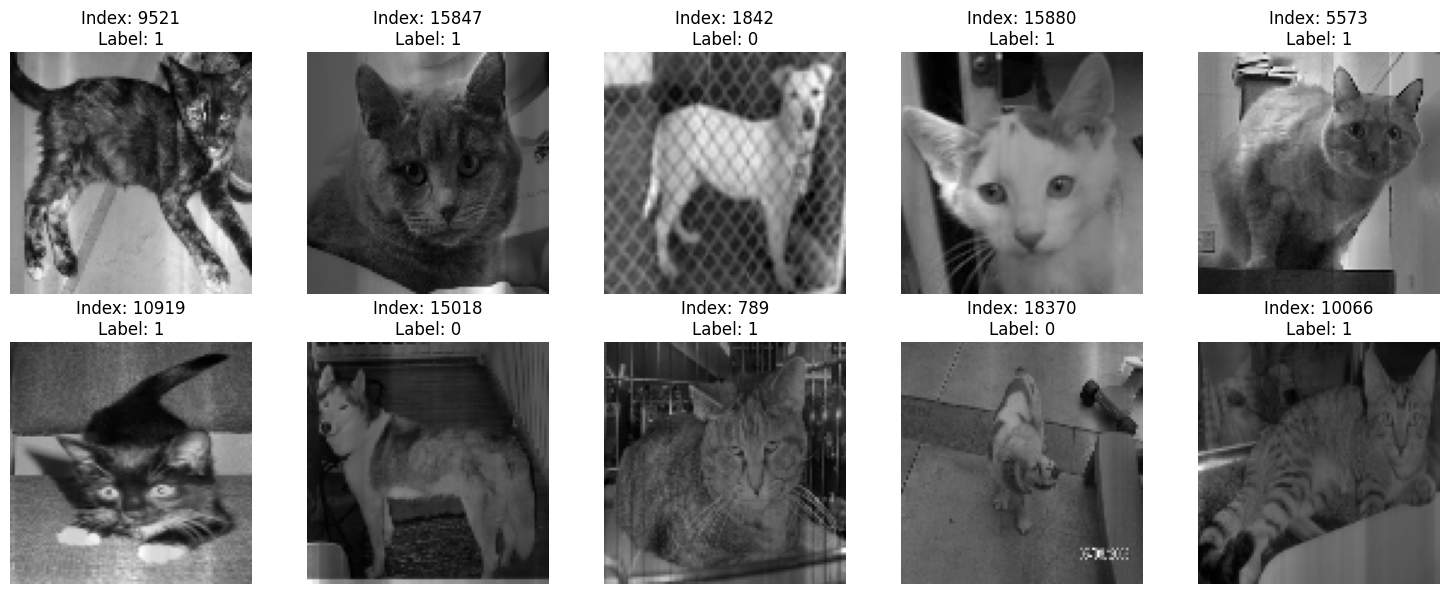

In [63]:
#Debugging
# Make sure y_train is a flat array (not one-hot encoded)
if y_train.ndim > 1:
    y_train_labels = 1- np.argmax(y_train, axis=1)
else:
    y_train_labels = y_train

# Pick 10 images to check
sample_indices = np.random.choice(len(X_train), 10, replace=False)

# Plot the images and print labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    idx = sample_indices[i]
    image = X_train[idx].squeeze()
    label = y_train_labels[idx]

    ax.imshow(image, cmap='gray')
    ax.set_title(f"Index: {idx}\nLabel: {label}")
    ax.axis('off')

    # Print index and label in the console too
    print(f"Index {idx} → Label: {label}")

plt.tight_layout()
plt.show()